# 初期設定

In [1]:
# グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt

# Jupyter上に図を表示するためのおまじない
%matplotlib inline

# データの扱いに必要なライブラリ
import pandas as pd

# チャートがきれいになるおまじない
plt.style.use('ggplot')

#http://pythondatascience.plavox.info/matplotlib/%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95

# サンプルファイル作成

## 時系列データサンプル

In [13]:
### csvファイルのPATHを設定
csv_path='csv/Temperature.csv'

### テスト用ファイルの作成
strs = """Date,Tokushima,Naruto,Anan
2020-01-01,5,6,3
2020-01-02,6,8,4
2020-01-03,9,10,6
2020-01-04,4,5,2
2020-01-05,5,6,3
"""
f = open(csv_path, 'w')
f.writelines(strs)
f.close

### プロットするデータの整形
df = pd.read_csv(csv_path, index_col=0)
df = df.iloc[:, [0, 1, 2]]
df.columns = [u'徳島', u'鳴門', u'阿南']
df.index = pd.to_datetime(df.index)
df

,徳島,鳴門,阿南
Date,,,
2020-01-01,5,6,3
2020-01-02,6,8,4
2020-01-03,9,10,6
2020-01-04,4,5,2
2020-01-05,5,6,3


## ランダムデータサンプル

In [15]:
import random

month_num = 12
store_num = 5

num_list = [[random.randrange(1000,10000) for i in range(1, store_num + 1)] for n in range(1, month_num + 1)]

col_list = ["store" + str(i) for i in range(1, store_num + 1)]
row_list = ["month" + str(i) for i in range(1, month_num + 1)]

df = pd.DataFrame(num_list, index=row_list, columns=col_list)
df

,store1,store2,store3,store4,store5
month1,6543,6642,3754,2375,1035
month2,7548,1668,5480,9837,8481
month3,5401,5899,6593,5993,7339
month4,4569,6373,5894,4981,4174
month5,3041,7647,7286,9746,4044
month6,5229,6887,9912,1720,5891
month7,3080,6209,2493,2514,3585
month8,9713,8534,8016,8898,7049
month9,7326,5317,7057,9291,5024
month10,4706,8986,4369,3549,1792


# グラフ表示

* plotメソッド
    * matplotlibのラッパー
* グラフ表示の流れ
    1. matplotlibインポート
    1. plotメソッドでプロットを作成
    1. plot.show()で表示
        * ただし、Jupyterのinline設定をしている場合はplotメソッドでプロットを作成した段階でグラフが表示される
    1. plot.close()でクローズしてメモリを開放
        * 少ない回数しか表示しない場合は省略しても特に問題ない
* その他
    * カーネル密度推定を使う場合はscipyのインストールも必要

## デフォルトとオプション

* デフォルト
    * 折れ線グラフ
* オプション
    * title
        * グラフのタイトル
    * figsize
        * グラフのサイズをタプルで指定 (横サイズ,縦サイズ)
    * grid
        * グリッド線の表示。表示したい場合はTrueにする
    * colormap
        * グラフの色彩パターン
            * binary, Pastel1, Pastel2, tab20c, gist_ncarなど
    * alpha
        * 透過率
            * 例: alpha = 0.5
    * style
        * グラフ戦の書式
            * 種類
                * "-" : solid
                * "--" : dashed
                * "-." : dash_dot
                * ":" : dotted
            * 例
                * style = "--"
    * legend
        * 凡例
            * 例
                * legend = False : 凡例非表示
                * legend = "reverse" : 反転
    * x
        * x軸で使うものを指定
        * 主に散布図で使う
    * y
        * y軸で使うものを指定
        * 主に散布図で使う
    * kind
        * グラフの種類
        

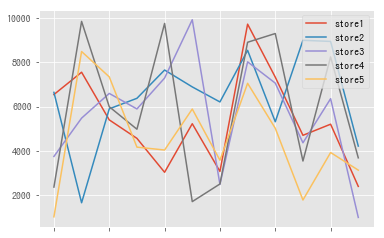

In [27]:
# デフォルト表示
df.plot()

### Jupyterのインライン設定をしている場合はshowは不要
#plt.show()

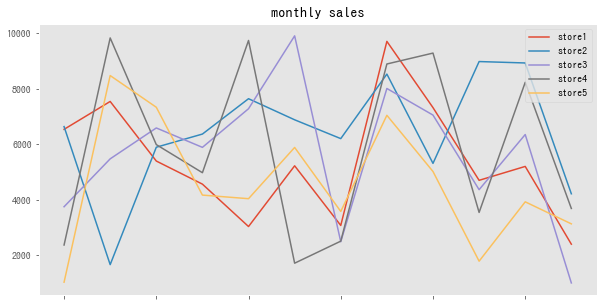

In [26]:
df.plot(
    title="monthly sales",  # タイトル設定
    figsize=(10,5),         # グラフのサイズ指定
    grid=False)             # グリッド線非表示

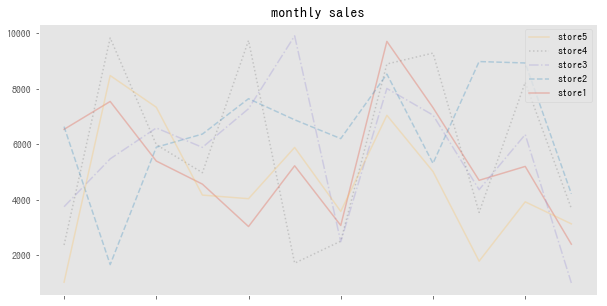

In [35]:
df.plot(
    title="monthly sales",
    figsize=(10,5),
    grid=False,
    alpha=0.3,                    # 透過率
    style=["-","--","-.",":"],    # グラフ線の書式
    legend="reverse")             # 凡例を逆順に表示

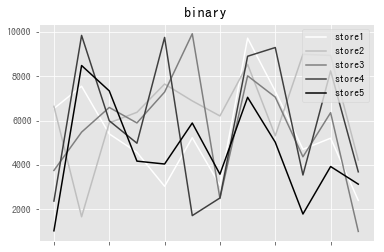

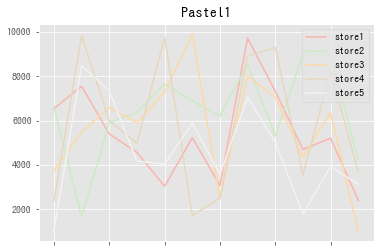

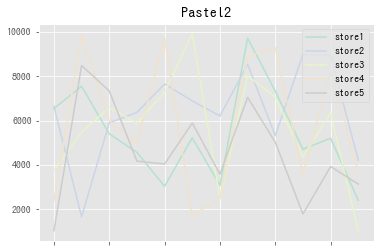

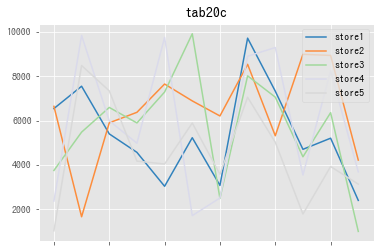

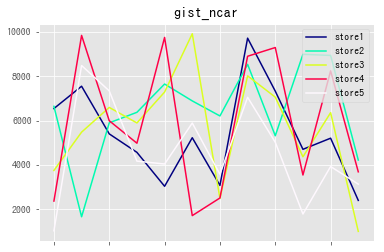

In [48]:
# カラーマップ
df.plot(title="binary", colormap="binary")
df.plot(title="Pastel1", colormap="Pastel1")
df.plot(title="Pastel2", colormap="Pastel2")
df.plot(title="tab20c", colormap="tab20c")
df.plot(title="gist_ncar", colormap="gist_ncar")

# グラフの種類

## 折れ線グラフ
    * デフォルト

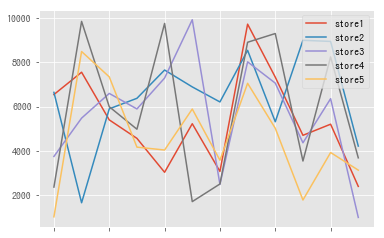

In [49]:
df.plot(kind = "line")

## 棒グラフ

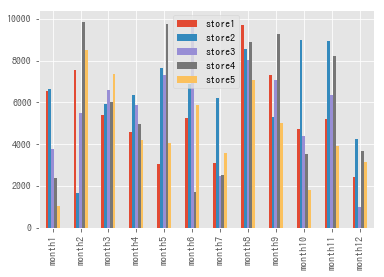

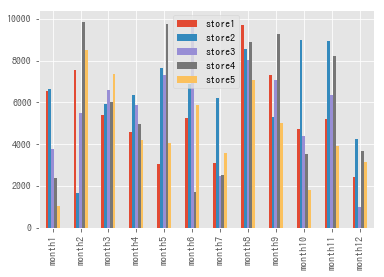

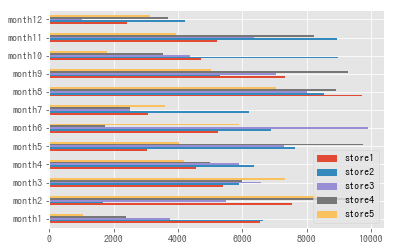

In [53]:
df.plot(kind = "bar")

# 以下の書き方も可
df.plot.bar()

# 横棒グラフ
df.plot(kind = "barh")

## 円グラフ

* 1列のみ
    * 複数列を指定するとエラーになる

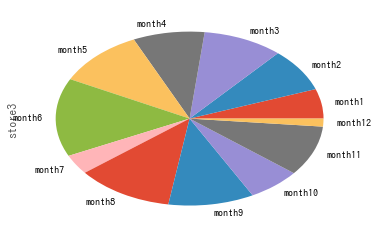

In [54]:
df["store3"].plot(kind = "pie")

## 積み上げグラフ

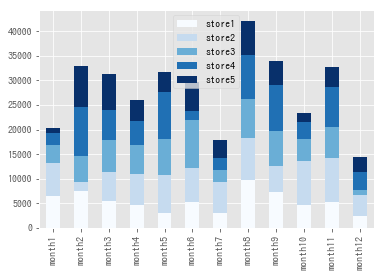

In [60]:
### 積み上げグラフ。青色を基調
df.plot.bar(stacked=True, cmap='Blues')

## ヒストグラム

* 色分けが重要。alphaを指定すると見やすくなる。

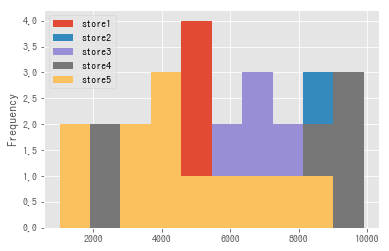

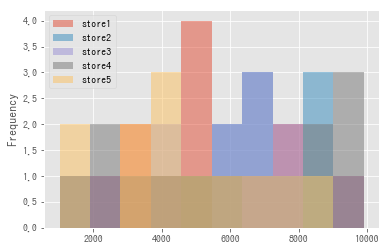

In [57]:
df.plot(kind='hist')
df.plot(kind='hist', alpha=0.5)

## カーネル密度推定

* カーネル密度推定とは
    * 統計学において確率変数の確率密度関数を推定する手法の一つ
        * 有限の標本点から全体の分布を推定する
    * 例
        * 犯罪の発生地点を表すポイントデータからポイントの無い地点の犯罪発生率を補完して推定
    * 利用するにはscipyライブラリが必要

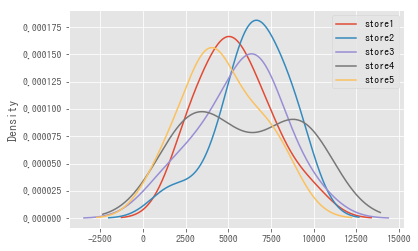

In [65]:
df.plot(kind='density')

## 箱ひげ図

* 箱ひげ図とは
    * 5数要約からなる
        * 最小値
        * 第1四分位点
        * 第2四分位点 (中央値)
        * 第3四分位点
        * 最大値

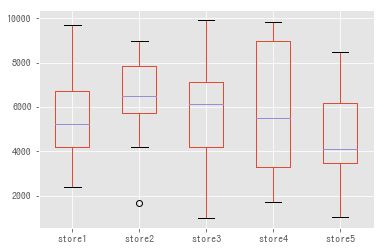

In [61]:
df.plot(kind='box')

## 面グラフ

* 折れ線グラフに基づいて塗りつぶしたもの
* alphaによる透過率で見やすくなることもある

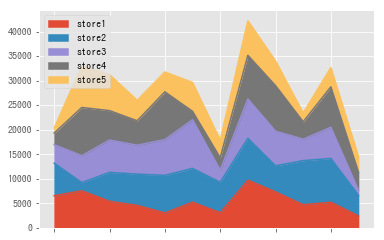

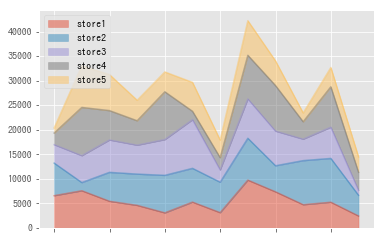

In [62]:
df.plot(kind='area')
df.plot(kind='area', alpha=0.5)

## 散布図(分布図)

* 散布図とは
    * 縦軸と横軸に2項目の量や大きさなどを対応させ、データ点でプロットしたもの
    * 2項目の分布、相関関係を把握できる
    * 見た目の関係性のみで因果関係(どちらかが原因でもう一方が起こる)を示すものではない
        * 例
            * 「血圧が上がるほど給料も上がる」
            * -> 一般的に年齢と共に血圧も給料も上がる傾向があるが、2つの間に因果関係は無い
* xとyのオプションは必須

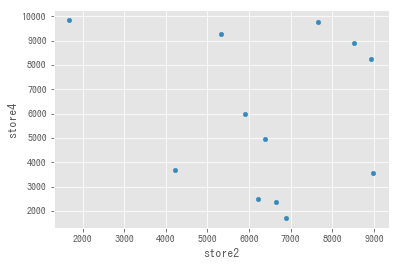

In [63]:
df.plot(kind="scatter", x="store2", y="store4")

## 六角形型散布図

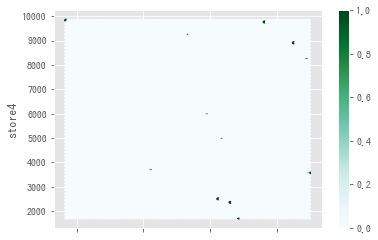

In [64]:
df.plot(kind="hexbin", x="store2", y="store4")

# グラフの保存

* savefigメソッド

In [21]:
df.plot()
plt.savefig("img/sample.png")

# 何枚か保存することを想定して一応プロットをclose
plt.close()